## Manual tracking

When you execute `trackUsingMouse()`:
1. The TIF file is shown in Fiji and you have to follow the spot of interest with the mouse (see`fps` below for details). When done, close the window (depending on you system, you may also have to close Fiji). A `.mtrk` file is created (columns specified in header).  
If __`performFit`__ is set to`True`, then:
2. Spots are detected using a s.d. threshold on a bandpass filtered image. The
     region of interest (ROI) is centered on the position of the mouse. The detected
     spot that is the closest to both the mouse position and the spot found in
     the previous image (mim square sum) is selected.
3. Iterative Gaussian mask fitting is used to localize and fit the spot in each
     frame. A `.trk2` file is created (columns specified in header).  
  

Parameters:
- __`fnTif`__:         Full path of the TIF file to be tracked.
- __`fnSuff`__:        Suffix added at the end of the TIF file name for the resulting `.mtrk` and `.trk2` files.
- __`fps`__:           Frame rate at which the movie is played during the manual tracking.  
If `0`, the movie has to be played manually (with right/left arrows or mouse wheel). You can go back and forth, only the last time a frame is shown is retained. (Caution: The mouse coordinates for a given frame are recorded when switching from that frame to another one. Hence, when you reach the end of the movie, you will need to go one frame back so that last frame is recorded too).  
If `< 0`, fiji macro will not be run so that the existing `.mtrk` file is re-used. (Default: `0`)
- __`performFit`__     If `False`, only the `.mtrk` file is generated. If `True`, Gaussian mask fitting is performed using the following parameters (note: only works on single-channel images for now).
- __`psfPx`__:         PSF size in pixels. Used for the bandpass filtering. (Default: `1.7`)
- __`psfZPx`__:        PSD size in pixels in Z. If `None`, the value of `psfPx` is used.
- __`thresholdSD`__:   Number of standard deviations used to detect objects in the bandpassed image. (Default: `5.`)
- __`roiSize`__:       Size in pixels of the ROI. (Default: `40`)
- __`border`__:        Number of pixels added one each side of the ROI in the bandpass filtering and removed afterwards. (Default: 3)
- __`distThreshold`__: Maximal distance that the spot can be from the position of the mouse. Used for both object detection in the bandpassed-filtered image and for testing the convergence of the Gaussian fit algorithm. (Default: 20.)
- __`trackMemory`__:   Maximal number of frames used for the location of the previous spot. If 0, only the distance to the mouse coordinates is used. (Default: 0)
- __`reactionDelay`__: Time delay (in sec) by which the manual coordinates are expected to be lagging. (Default: 0.)
- __`disp`__:          If `1`, the result of the tracking is displayed as graphs. If `2`, a `..._track.tif` file is created for visual inspection. Can be combined; e.g. `disp=1+2`. (Default: `3`)


In [2]:
import tracking as trk

## First, adjust the following:

trk.fijiCmd='/Applications/Fiji.app/Contents/MacOS/ImageJ-macosx' # Mac
#trk.fijiCmd='C:/Users/Coulon_team/.Fiji.app/ImageJ-win64.exe'     # Windows
#trk.fijiCmd='/usr/bin/fiji'                                       # Linux
trk.fijiCmd = '/home/umr3664/.Fiji.app/ImageJ-linux64'

In [ ]:
basePath='/Put/the/path/to/your/data/here/'

trk.trackUsingMouse(basePath+'youFile.tif','_spot1',fps=5)


## Examples
### 1. On a max projection (or single-plane movie)

In [3]:
import os;
basePath=os.getcwd()+'/example1/'

trk.trackUsingMouse(basePath+'191115_dcas9JF549-sg403_dCas9JF646-sg433_2_MMStack_Pos1.ome_crop_off0_nrmd_reg_max10-17_ch1.tif',
                    '_spot1')


Error when renaming mtrk file.


FileNotFoundError: [Errno 2] No such file or directory: '/data/CoulonLab/Maxime/trackUsingMouse/example1/191115_dcas9JF549-sg403_dCas9JF646-sg433_2_MMStack_Pos1.ome_crop_off0_nrmd_reg_max10-17_ch1_spot1.txt' -> '/data/CoulonLab/Maxime/trackUsingMouse/example1/191115_dcas9JF549-sg403_dCas9JF646-sg433_2_MMStack_Pos1.ome_crop_off0_nrmd_reg_max10-17_ch1_spot1.mtrk'

### 2. On a z-stack movie

Detecting spots... frame 0 - 1 object(s). best=[251.5,155.0,3.0]
Detecting spots... frame 1 - 1 object(s). best=[236.5,183.0,7.5]
Detecting spots... frame 2 - 2 object(s). best=[235.5,143.5,12.0]
Detecting spots... frame 3 - 2 object(s). best=[231.0,148.0,14.0]
Detecting spots... frame 4 - 2 object(s). best=[227.0,156.5,15.0]
Detecting spots... frame 5 - 3 object(s). best=[227.5,149.0,16.0]
Detecting spots... frame 6 - 2 object(s). best=[215.0,151.5,13.0]
Detecting spots... frame 7 - 1 object(s). best=[217.5,148.5,16.5]
Detecting spots... frame 8 - 1 object(s). best=[222.0,142.0,12.5]
Detecting spots... frame 9 - 2 object(s). best=[222.5,142.0,10.5]
Detecting spots... frame 10 - 2 object(s). best=[215.5,139.0,10.5]
Detecting spots... frame 11 - 1 object(s). best=[218.0,146.0,13.0]
Detecting spots... frame 12 - 1 object(s). best=[226.0,146.0,15.0]
Detecting spots... frame 13 - 2 object(s). best=[216.0,148.5,17.5]
Detecting spots... frame 14 - 2 object(s). best=[217.5,152.0,17.0]
Detecti

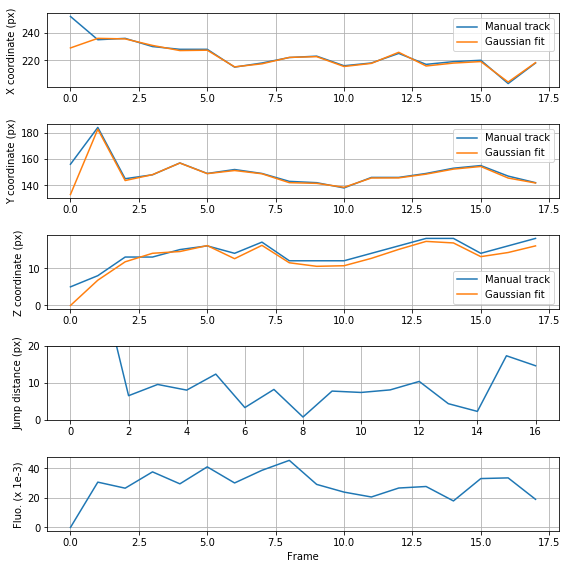

In [4]:
import os;
basePath=os.getcwd()+'/example2/'

trk.trackUsingMouse(basePath+'191115_dcas9JF549-sg403_dCas9JF646-sg433_2_MMStack_Pos1.ome_crop_off0_nrmd_reg_ch1.tif',
                    '_spot1')


### 3. On a z-stack movie (possibly with several channels). Without Gaussian fitting

In [4]:
import os
basePath = "/home/umr3664/CoulonLab/dropbox/CoulonLab/data/Maxime/drift-correction/Antoine/20200221/20210318/"
trk.trackUsingMouse(basePath+'concatenated_Pos5DC0.ome.tif', '_',performFit=False)

Generated file '/home/umr3664/CoulonLab/dropbox/CoulonLab/data/Maxime/drift-correction/Antoine/20200221/20210318/concatenated_Pos5DC0.ome_.mtrk'


In [15]:
#!rm '/home/umr3664/dropbox/data/Maxime/drift-correction/Veer/20191223 - array7/20200611/concatenated_Pos3DC0.ome_.mtrk'
!cat '/home/umr3664/CoulonLab/dropbox/CoulonLab/data/Maxime/drift-correction/Antoine/20200221/20210318/

# T X Y Z
1 274 288 1
1 274 288 1
1 274 288 3
1 274 288 4
1 274 288 6
1 274 288 7
1 274 288 8
1 274 288 9
1 274 288 10
1 274 288 11
1 274 288 12
1 141 136 13
2 188 177 13
1 182 159 13
2 189 176 13
3 188 172 13
3 188 172 12
3 188 172 13
3 188 172 12
3 188 172 11
3 188 172 10
3 188 172 9
3 188 172 8
3 188 172 7
3 190 177 6
4 4 5 6
5 198 181 6
6 4 4 6
7 201 189 6
8 199 187 6
9 197 185 6
10 195 185 6
11 2 2 6
12 192 178 6
12 187 292 6
12 192 180 6
13 195 175 6
14 195 175 6
15 199 174 6
16 199 174 6
17 198 173 6
18 198 173 6
19 195 169 6
20 195 169 6
21 195 169 6
22 4 5 6
23 196 167 6
24 200 168 6
25 200 168 6
26 200 168 6
27 200 168 6
28 200 168 6
29 201 165 6
30 201 165 6
31 201 165 6
32 203 170 6
33 203 170 6
